In [88]:
from Params import *
from numpy import *
from PlotFuncs import *
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from numba import jit,njit
from numpy import random
from scipy.integrate import cumtrapz
import cmocean

@jit(nopython=True)
def costh2N(t,costh_X,phi_X,lat):
    # t in days
    lat *= pi/180
    wt = 2*pi*t
    th_X = arccos(costh_X)
    return (sin(th_X)*cos(phi_X)*sin(lat)*cos(wt) - sin(th_X)*sin(phi_X)*sin(lat)*sin(wt) + costh_X*cos(lat))**2

@jit(nopython=True)
def costh2W(t,costh_X,phi_X,lat):
    # t in days
    lat *= pi/180
    wt = 2*pi*t
    th_X = arccos(costh_X)
    return (sin(th_X)*cos(phi_X)*sin(wt) - sin(th_X)*sin(phi_X)*cos(wt))**2

@jit(nopython=True)
def costh2Z(t,costh_X,phi_X,lat):
    # t in days
    lat *= pi/180
    wt = 2*pi*t
    th_X = arccos(costh_X)
    return (sin(th_X)*cos(phi_X)*cos(lat)*cos(wt) + sin(th_X)*sin(phi_X)*cos(lat)*sin(wt) + costh_X*sin(lat))**2

@jit(nopython=True)
def costh2ZW(t,costh_X,phi_X,lat):
    return 1 - costh2N(t,costh_X,phi_X,lat)

@jit(nopython=True)
def costh2ZN(t,costh_X,phi_X,lat):
    return 1 - costh2W(t,costh_X,phi_X,lat)

@jit(nopython=True)
def costh2NW(t,costh_X,phi_X,lat):
    return 1 - costh2Z(t,costh_X,phi_X,lat)

ngen = 100000
costh_X = 2*random.uniform(size=ngen)-1.0
phi_X = 2*pi*random.uniform(size=ngen)

def costh_T(fcosth2,lat,DT,T,nbins=2000): 
    nt = len(T)-1
    c1t = zeros(shape=(ngen,nt+1))

    for i in range(0,nt+1):
        c1t[:,i] = fcosth2(T[i]+DT,costh_X,phi_X,lat)

    c_av = cumtrapz(c1t,T)/T[1:]
    return c_av

def costh_av_Rescan(dT,DT,fcosth2,lat,nt=20):
    T = linspace(0,dT,nt)
    
    c1t = zeros(shape=(ngen,nt))
    c2t = zeros(shape=(ngen,nt))

    for i in range(0,nt):
        c1t[:,i] = fcosth2(T[i],costh_X,phi_X,lat)
        c2t[:,i] = fcosth2(T[i]+DT,costh_X,phi_X,lat)

    c_av = 0.5*(trapz(c1t,T)/dT + trapz(c2t,T)/dT)
    
    C_05 = sort(c_av)[int(0.05*ngen)]

        
    C_enhancement = C_05/(sort(trapz(c1t,T)/dT)[int(0.05*ngen)])
    
    return C_05,C_enhancement


def costh_av_Rescan_dist(dTvals,DTvals,fcosth2,lat):
    n1 = len(DTvals)
    n2 = len(dTvals)
    C = zeros(shape=(n1,n2))
    C_enhancement = zeros(shape=(n1,n2))
    for i in range(0,n1):
        for j in range(0,n2):
            C[i,j],C_enhancement[i,j] = costh_av_Rescan(dTvals[j],DTvals[i],fcosth2,lat)
        print(i)
    return C,C_enhancement


def costh_av_Rescan_dist_alt(dTvals,DTvals,fcosth2,lat):
    n1 = len(DTvals)
    n2 = len(dTvals)-1
    
    c_av0 = costh_T(fcosth2,lat,0,dTvals)
    C0 = zeros(shape=n2)
    for i in range(0,n2):
        C0[i] = sort(c_av0[:,i])[int(0.05*ngen)]
    
    
    C = zeros(shape=(n1,n2))
    C_enhancement = zeros(shape=(n1,n2))
    for i in range(0,n1):
        c_av1 = costh_T(fcosth2,lat,DTvals[i],dTvals)
        
        c_av = 0.5*(c_av0+c_av1)
        for j in range(0,n2):
            C[i,j] = sort(c_av[:,j])[int(0.05*ngen)]
            
        C_enhancement[i,:] = C[i,:]/C0
            
        print(i)
    return C,C_enhancement

n1 = 200
n2 = 200
DTvals = linspace(0.01,1.0,n1)
dTvals = logspace(log10(10/(24*60)),log10(5.0),n2+1)

# C1,C1_enhancement = costh_av_Rescan_dist_alt(dTvals,DTvals,costh2N,55)
# C2,C2_enhancement = costh_av_Rescan_dist_alt(dTvals,DTvals,costh2Z,35)
# C3,C3_enhancement = costh_av_Rescan_dist_alt(dTvals,DTvals,costh2ZW,55)
# C4,C4_enhancement = costh_av_Rescan_dist_alt(dTvals,DTvals,costh2NW,35)

CW,CW_enhancement = costh_av_Rescan_dist_alt(dTvals,DTvals,costh2W,35)
CZN,CZN_enhancement = costh_av_Rescan_dist_alt(dTvals,DTvals,costh2ZN,35)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104


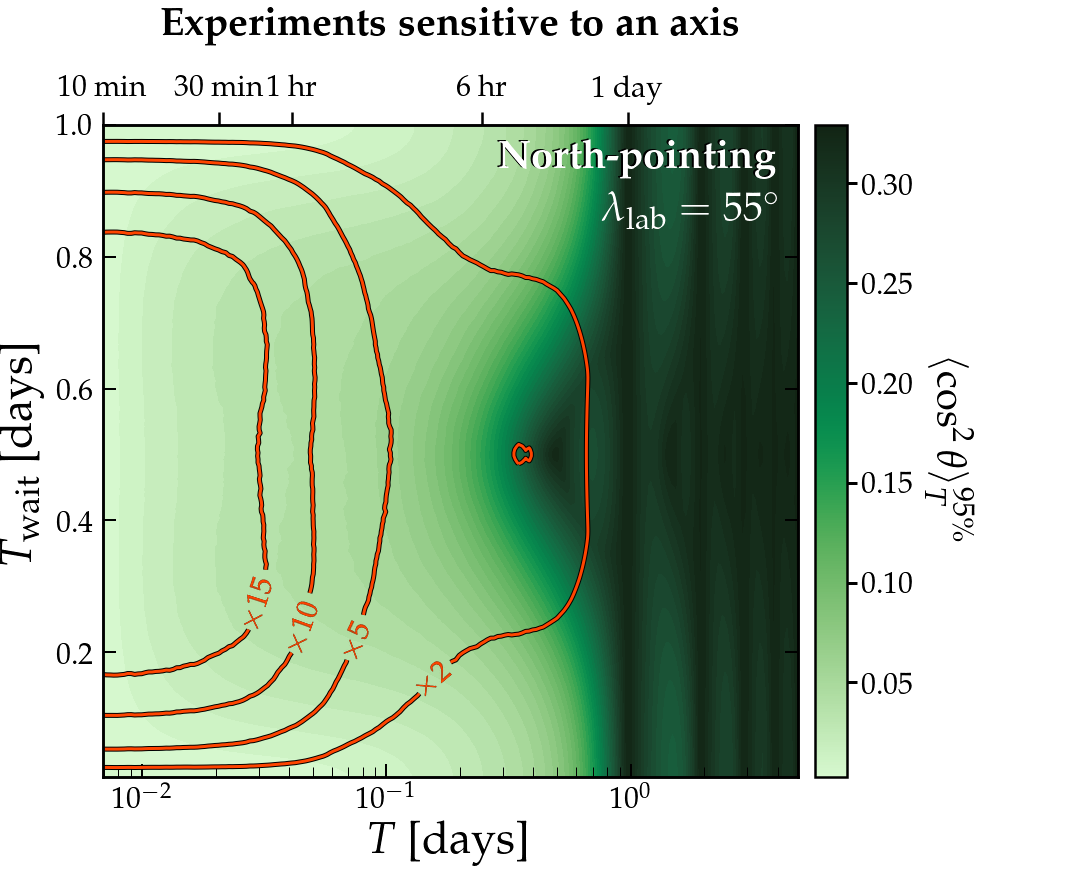

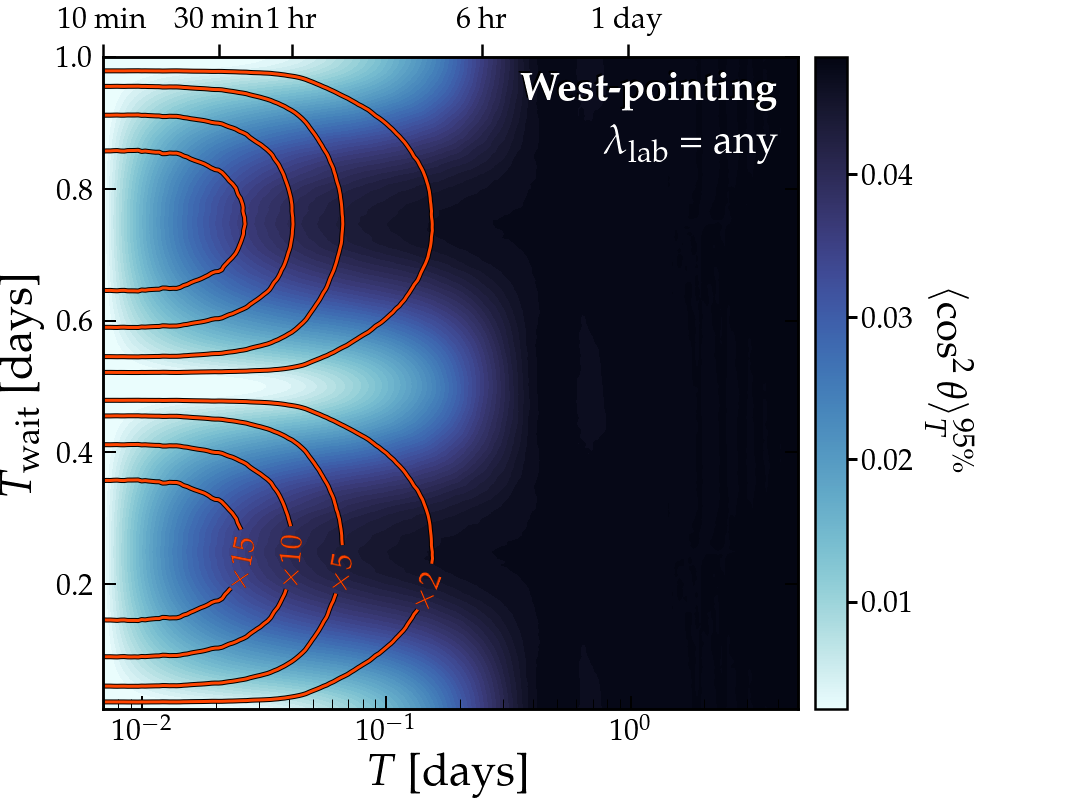

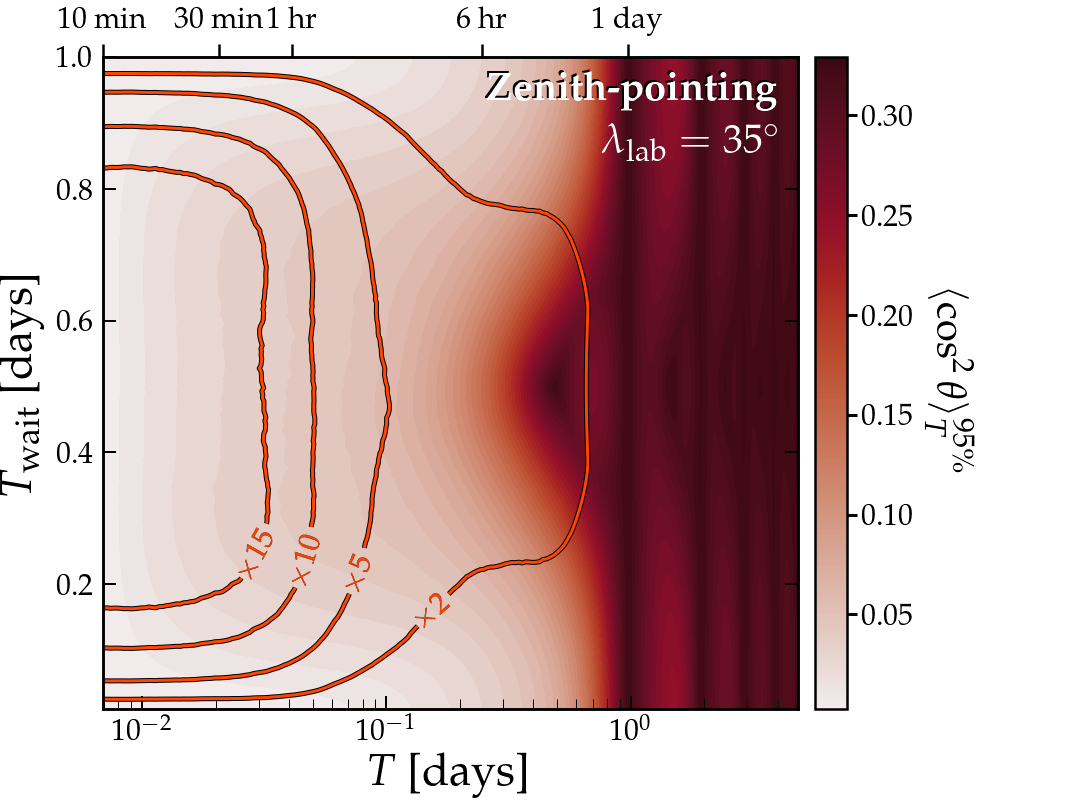

In [157]:
import matplotlib.colors as colors
import matplotlib.patheffects as pe
pek=[pe.Stroke(linewidth=5, foreground='k',alpha=1), pe.Normal()]

def fmt(x):
    s = f"{x:.1f}"
    if s.endswith("0"):
        s = f"{x:.0f}"
    return rf"$\times${s}"

def Plot_costh_Rescan(C,C_enhancement,levels,clab_loc,cmap,cont_col,axis_lab,lat_lab,cbar_lab):
    fig,ax = MySquarePlot(r'$T$ [days]',r'$T_{\rm wait}$ [days]',size_x=15,tfs=30)
    ax.tick_params(pad=10)
    
    ax.set_xscale('log')
    ax.set_xlim([dTvals[0],dTvals[-2]])
    ax2 = ax.twiny()
    ax2.set_xscale('log')
    ax2.set_xlim([dTvals[0],dTvals[-1]])
    ax2.set_xticks([10/(24*60),30/(24*60),1/24,6/24,1])
    ax2.set_xticklabels(['10 min','30 min','1 hr','6 hr','1 day'])
    ax2.minorticks_off()
    ax2.tick_params(which='major',direction='out',width=2.5,length=13,pad=7)

    plt.sca(ax)
    im = ax.pcolormesh(dTvals[0:-1],DTvals,C,cmap=cmap,vmin=0.0025,vmax=amax(C))
    ax.contourf(dTvals[0:-1],DTvals,C,cmap=cmap,levels=50,vmin=0.0025,vmax=amax(C))
    CS1 = ax.contour(dTvals[0:-1],DTvals,C_enhancement,levels=levels,colors=['k'],linewidths=5)
    CS = ax.contour(dTvals[0:-1],DTvals,C_enhancement,levels=levels,colors=[cont_col],linewidths=3)
    plt.plot([],[],'-',color=cont_col,lw=3,label='Enhancement',path_effects=pek)
    ax.clabel(CS1, CS1.levels, inline=True, fmt=fmt,fontsize=30,manual=clab_loc)
    ax.clabel(CS, CS.levels, inline=True, fmt=fmt,fontsize=30,manual=clab_loc)

    #plt.legend(framealpha=1,loc='lower right')
    cbar1 = plt.colorbar(im,pad=0.02)
    cbar1.ax.tick_params(which='minor',length=8,width=2)
    cbar1.ax.tick_params(which='major',length=10,width=3)
    cbar1.set_label(cbar_lab,fontsize=40,rotation=-90,labelpad=50)

    plt.gcf().text(0.748,0.832,axis_lab,fontsize=40,ha='right',color='k')
    plt.gcf().text(0.75,0.83,axis_lab,fontsize=40,ha='right',color='w')
    plt.gcf().text(0.75,0.76,lat_lab,fontsize=40,ha='right',color='w')
    plt.gcf().text(1.0,0.5,'--',zorder=-100,color='w')
    return fig,ax

cbar_lab = r'$\langle \cos^2\theta \rangle_T^{95\%}$'

levels1 = [2,5,10,15]
clab_loc1 = [(0.016, 0.32), (0.04, 0.25), (0.1, 0.2), (0.2, 0.1)]
axis_lab1 = r'{\bf North-pointing}'
lat_lab1 = r'$\lambda_{\rm lab} = '+str(int(55))+r'^\circ$'

levels2 = [2,5,10,15]
clab_loc2 = [(0.02, 0.245), (0.04, 0.24), (0.07, 0.22), (0.2, 0.16)]
axis_lab2 = r'{\bf West-pointing}'
lat_lab2 = r'$\lambda_{\rm lab}$ = {\rm any}'

levels3 = [2,5,10,15]
clab_loc3 = [(0.0175, 0.31), (0.04, 0.25), (0.1, 0.2), (0.2, 0.1)]
axis_lab3 = r'{\bf Zenith-pointing}'
lat_lab3 = r'$\lambda_{\rm lab} = '+str(int(35))+r'^\circ$'

fig1,ax1 = Plot_costh_Rescan(C1,C1_enhancement,levels1,clab_loc1,cmocean.cm.algae,'orangered',axis_lab1,lat_lab1,cbar_lab)
plt.title(r'{\bf Experiments sensitive to an axis}',fontsize=40,pad=40)

fig2,ax2 = Plot_costh_Rescan(CW,CW_enhancement,levels2,clab_loc2,cmocean.cm.ice_r,'orangered',axis_lab2,lat_lab2,cbar_lab)
fig3,ax3 = Plot_costh_Rescan(C2,C2_enhancement,levels3,clab_loc3,cmocean.cm.amp,'orangered',axis_lab3,lat_lab3,cbar_lab)

MySaveFig(fig1,'Rescan_North')
MySaveFig(fig2,'Rescan_West')
MySaveFig(fig3,'Rescan_Zenith')

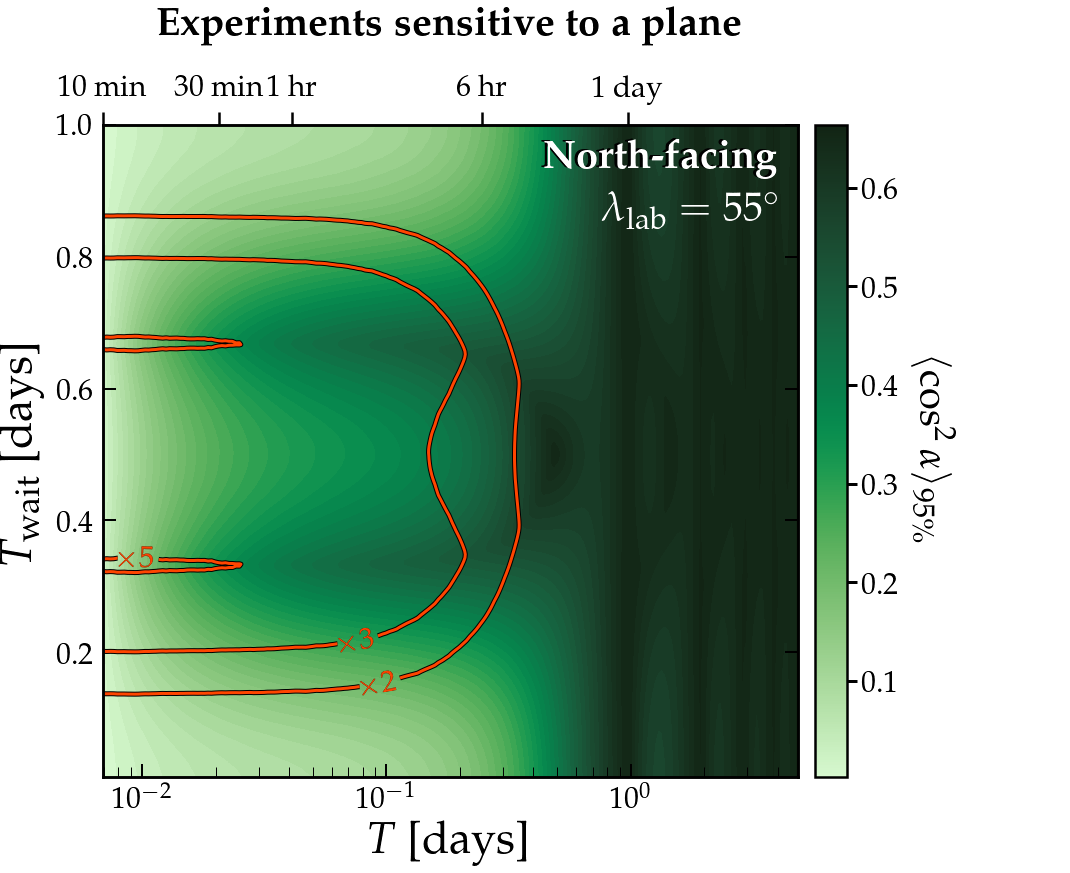

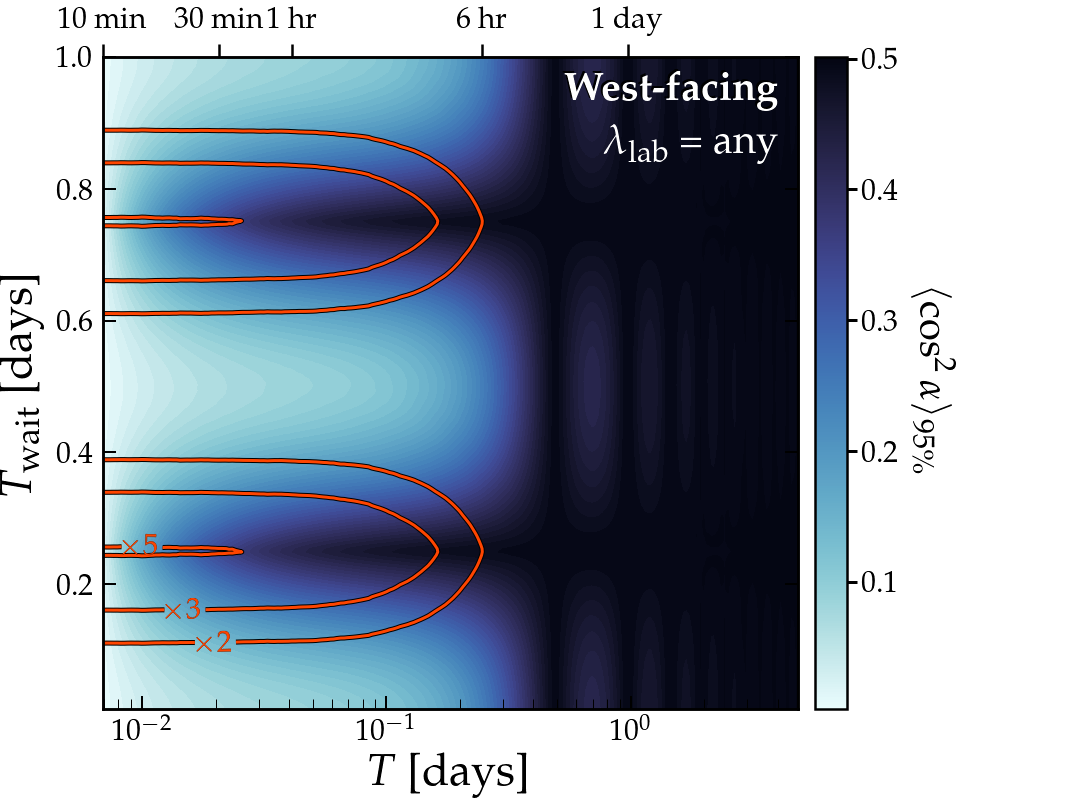

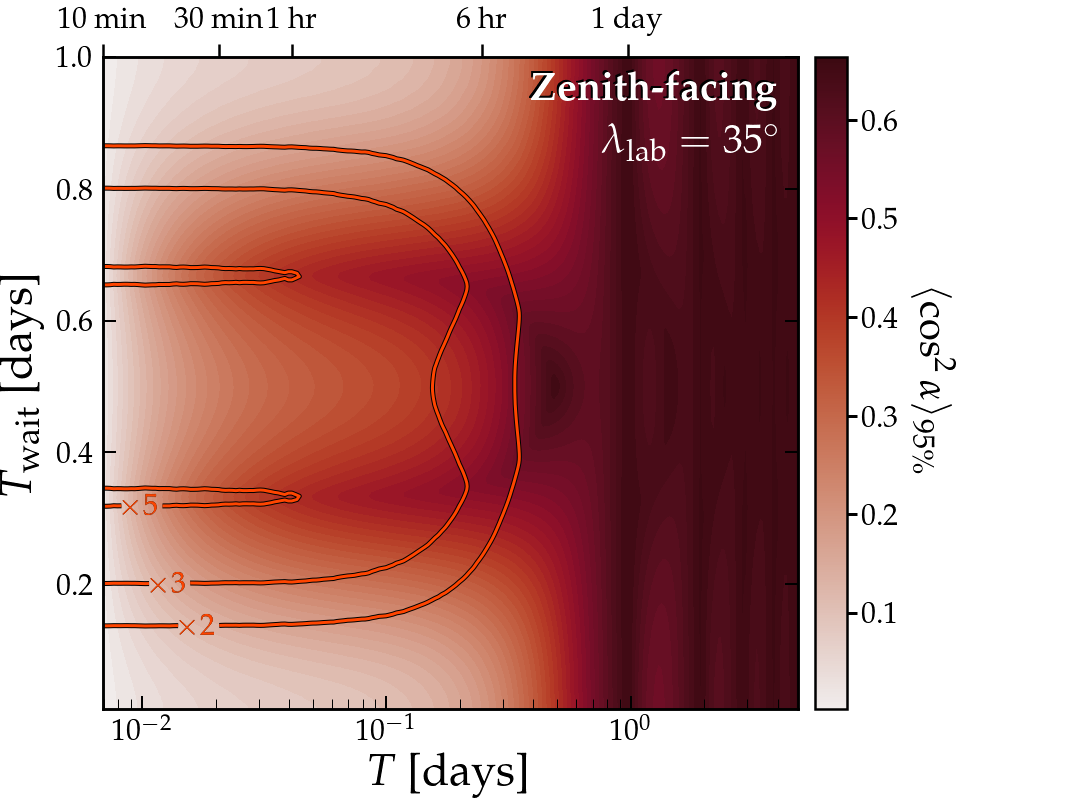

In [156]:
cbar_lab = r'$\langle \cos^2\alpha \rangle_{95\%}$'


levels1 = [2,3,5]
clab_loc1 = [(0.01, 0.5), (0.07, 0.3), (0.1, 0.1)]
axis_lab1 = r'{\bf North-facing}'
lat_lab1 = r'$\lambda_{\rm lab} = '+str(int(55))+r'^\circ$'

levels2 = [2,3,5]
clab_loc2 = [(0.01, 0.25), (0.015, 0.18), (0.02, 0.1)]
axis_lab2 = r'{\bf West-facing}'
lat_lab2 = r'$\lambda_{\rm lab}$ = {\rm any}'

levels3 = [2,3,5]
clab_loc3 = [(0.01, 0.32), (0.013, 0.18), (0.017, 0.1)]
axis_lab3 = r'{\bf Zenith-facing}'
lat_lab3 = r'$\lambda_{\rm lab} = '+str(int(35))+r'^\circ$'


fig1,ax1 = Plot_costh_Rescan(C3,C3_enhancement,levels1,clab_loc1,cmocean.cm.algae,'orangered',axis_lab1,lat_lab1,cbar_lab)
plt.title(r'{\bf Experiments sensitive to a plane}',fontsize=40,pad=40)


fig2,ax2 = Plot_costh_Rescan(CZN,CZN_enhancement,levels2,clab_loc2,cmocean.cm.ice_r,'orangered',axis_lab2,lat_lab2,cbar_lab)
fig3,ax3 = Plot_costh_Rescan(C4,C4_enhancement,levels3,clab_loc3,cmocean.cm.amp,'orangered',axis_lab3,lat_lab3,cbar_lab)

MySaveFig(fig1,'Rescan_NorthFacing')
MySaveFig(fig2,'Rescan_WestFacing')
MySaveFig(fig3,'Rescan_ZenithFacing')